In [1]:
import pandas as pd
import numpy as np
import quandl as qdl
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
api = qdl.ApiConfig.api_key = 'Your Key'

In [6]:
start = '2000-01-01'
end = '2020-01-01'
msft = qdl.get('EOD/MSFT',start_date = start, end_date = end)

In [17]:
fig = go.Figure(data = go.Candlestick(x = msft.index,
                                     open = msft['Open'],
                                     high = msft['High'],
                                     low = msft['Low'],
                                     close = msft['Close']))
fig.show()

In [18]:
##################    BOLLINGER BANDS STRATEGY
window_size = 10
rolling_mean = msft['Close'].rolling(window_size).mean()
rolling_std = msft['Close'].rolling(window_size).std()

msft['Rolling Mean'] = rolling_mean
msft['Bollinger High'] = rolling_mean + (rolling_std*2)
msft['Bollinger Low'] = rolling_mean - (rolling_std*2)

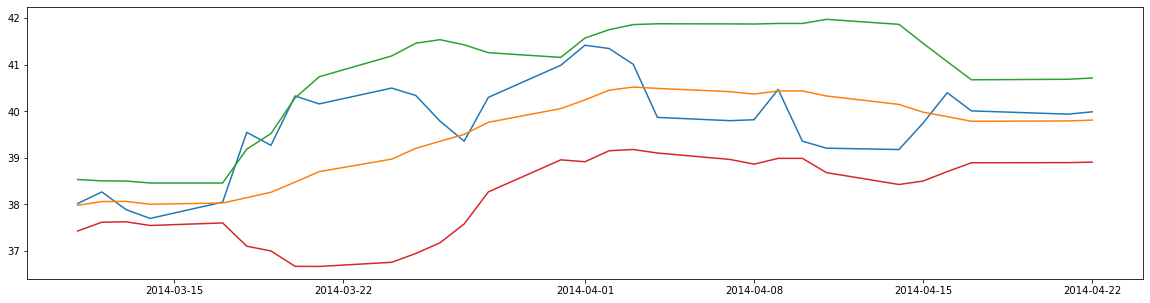

In [25]:
w_start = 130
w_size = 30
sd = msft[w_start:w_start + w_size]

fig = go.Figure(go.Candlestick(x = sd.index,
                              open = sd['Open'],
                              close = sd['Close'],
                              high = sd['High'],
                                     low = sd['Low']))

plt.figure(figsize=(20,5))
plt.plot(sd['Close'],)
plt.plot(sd['Rolling Mean'])
plt.plot(sd['Bollinger High'])
plt.plot(sd['Bollinger Low'])
plt.show()

In [35]:
######################         SLOPE METHOD

msft['Price1'] = msft['Close'].shift(-1)
msft['Slope'] = msft['Price1'] - msft['Close']

slope_mean = msft['Slope'].rolling(window_size).mean()
slope_std = msft['Slope'].rolling(window_size).std()

In [36]:
window_size = 10
msft['High_slope'] = rolling_mean + slope_std*3.5
msft['Low_slope'] = rolling_mean - slope_std*3.5

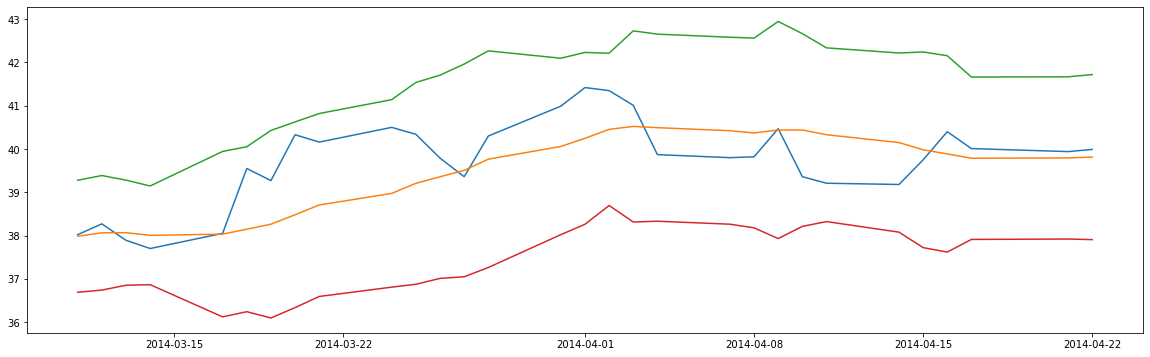

In [38]:
w_start = 130
w_size = 30
sd = msft[w_start:w_start + w_size]

fig = go.Figure(go.Candlestick(x = sd.index,
                              open = sd['Open'],
                              close = sd['Close'],
                              high = sd['High'],
                                     low = sd['Low']))

plt.figure(figsize=(20,6))
plt.plot(sd['Close'],)
plt.plot(sd['Rolling Mean'])
plt.plot(sd['High_slope'])
plt.plot(sd['Low_slope'])
plt.show()